# Policing and QuadTree

## Introduction
To repeat  this quote on Twitter.

_Geoplot is to cartopy what seaborn is to matplotlib._

So I decided to investigate geoplot.  One of the graphics it supports is Quadtree tesselation.  This is where, given a set of points in a plane, you split the area into increasingly smaller rectangular areas, until the maximum point count per area is achieved.

This inspired me to drag down the database of Queensland Police Station locations, and see what the Quadtree map looks like.


---------------
## Implementation

The following are the magics and imports for the Notebook

### Magics

```lab_black``` formats python cells, ```watermark``` provides reproducability information.

In [1]:
%load_ext lab_black

In [2]:
%load_ext watermark

### Imports

Because I am usually aiming for some 'nice' graphics, I import the cartopy gridline modules.

In [3]:
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd
import geopandas as gpd

import mapclassify as mc

import matplotlib.pyplot as plt
import numpy as np
import shapely

from cartopy.mpl.gridliner import (
    LONGITUDE_FORMATTER,
    LATITUDE_FORMATTER,
)
import cartopy.crs as ccrs

import math
import random

import doctest

import sys
import os
import subprocess
import datetime
import platform
import datetime

### Preliminaries

In order to get a recognizable map, the ```geoplot``` Quadtree diagram is best clipped to a polygon of interest  (in this case, the borders of Queensland).  Thankfully, the Queensland Government provides just such a data set.

I use the ```geopandas``` package the read the shapefile.

In [4]:
border_path = 'D:\\QLDBorder\\PolygonBorder\\QLD_STATE_POLYGON_shp.shp'

border = gpd.read_file(border_path)

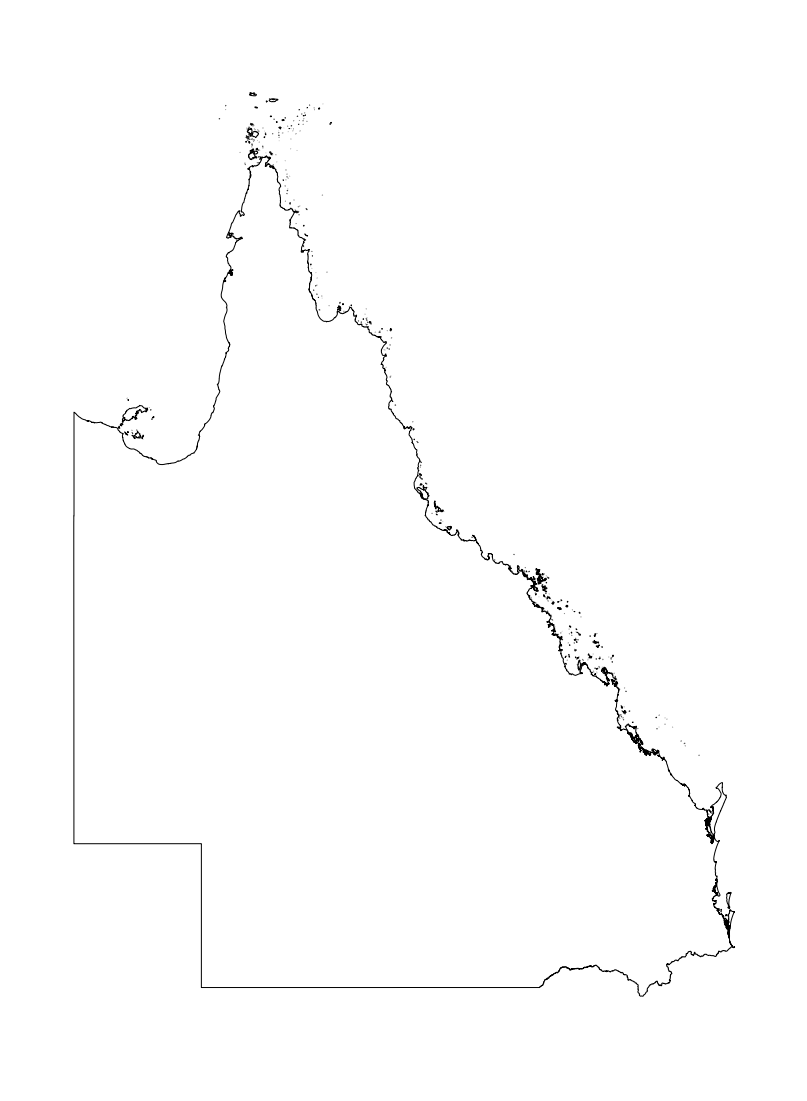

In [5]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.WebMercator())

gplt.polyplot(border, ax=ax, facecolor='white')

So now we have our basemap, I read the shapefile of the Police Station locations, again using ```geopandas```.

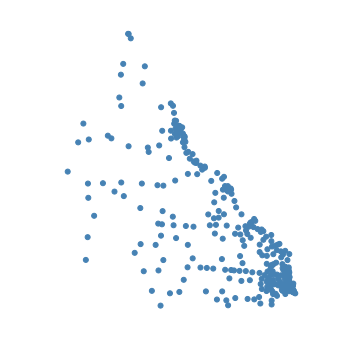

In [6]:
stations_path = (
    'D:\\QLDBorder\\QLD_Stations\\QPS_STATIONS.shp'
)

stations = gpd.read_file(stations_path)

gplt.pointplot(stations)

At this stage, all the data needed has been loaded.

### First Mapping Effort

We use ```geoplot``` to plot the polygons that make up the state, and the points that represent police stations.

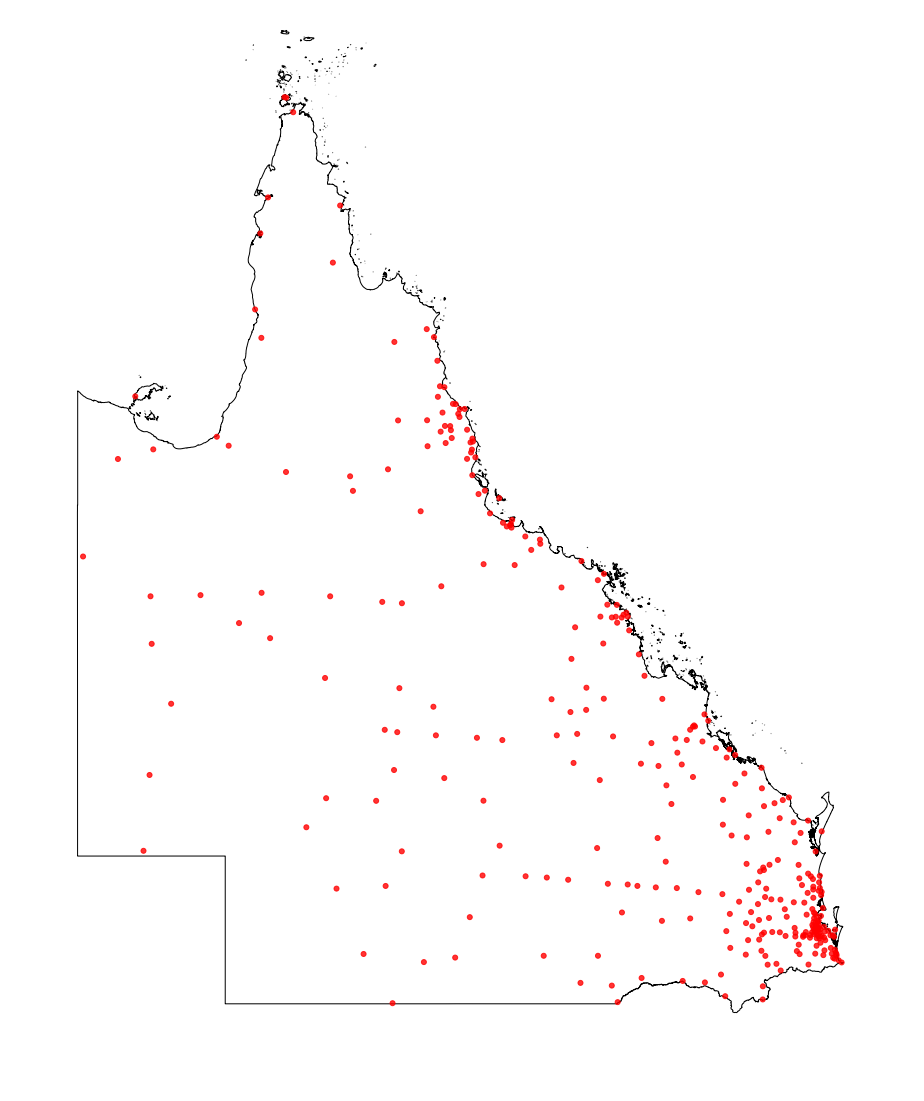

In [7]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.PlateCarree())

gplt.polyplot(border, ax=ax, facecolor='white')

gplt.pointplot(stations, ax=ax, color='red', alpha=0.8)

plt.show()

------------
## QuadTree Maps

A quadtree map is one where we subdivide our area into a rectangular grid, until each cell contains a specified numer of points (here, two).

Three lines of ```geoplot``` code gives us the map below.  The ```border.simplify``` cuts the time to perform the clipping significantly.

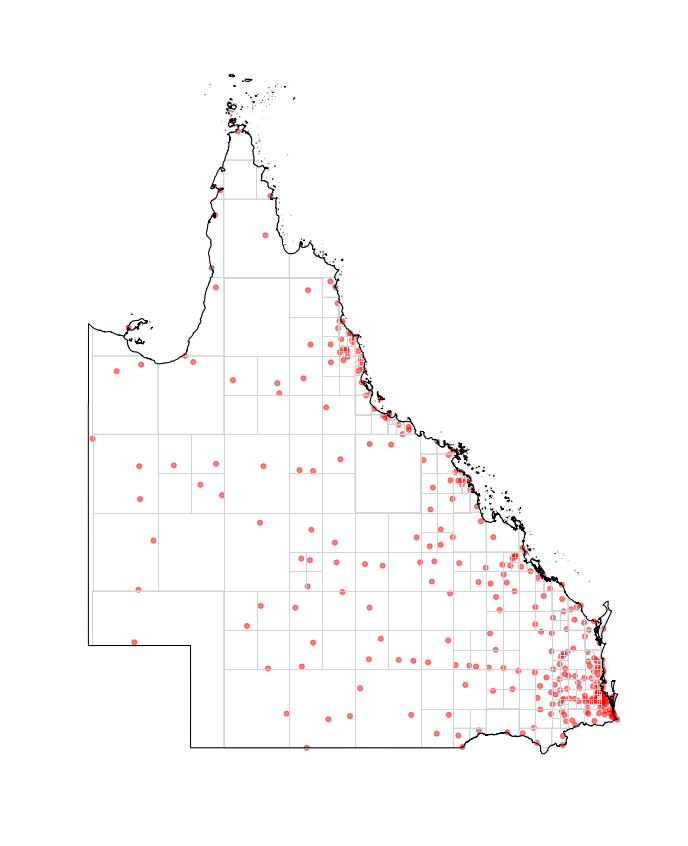

In [11]:
ax = gplt.quadtree(
    stations,
    clip=border.simplify(0.001),
    figsize=(15, 15),
    nmax=2,
    edgecolor='lightgray',
)
gplt.pointplot(stations, ax=ax, color='red', alpha=0.5)
gplt.polyplot(
    border,
    ax=ax,
    edgecolor='black',
    facecolor='none',
    zorder=5,
)

Again, this gives you a sense of how big an area each of the western police stations has to service.  Quadtrees are useful data structures for searching, but I don't think I'll be using in a visualization anytime soon.

## Reproducability Information

In [12]:
%watermark -h -iv

platform    1.0.8
geopandas   0.5.1
geoplot     0.4.0
numpy       1.15.4
mapclassify 2.0.1
pandas      0.23.4
cartopy     0.17.0
shapely     1.6.4.post1
matplotlib  3.0.2
host name: DESKTOP-SODFUN6


In [13]:
%watermark

2019-11-27T14:01:37+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [15]:
theNotebook = 'GeoplotQuadTree.ipynb'

In [16]:
# show info to support reproducibility


def python_env_name():
    envs = subprocess.check_output(
        'conda env list'
    ).splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(
        filter(lambda s: '*' in str(s), envu)
    )[0]
    env_name = str(active_env).split()[0]
    return env_name


# end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print(
    'Notebook run at: '
    + str(datetime.datetime.now())
    + ' local time'
)
print(
    'Notebook run at: '
    + str(datetime.datetime.utcnow())
    + ' UTC'
)
print('Notebook run on: ' + platform.platform())

python version : 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
python environment : ac5-py37
pandas version : 0.23.4
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\QLDCrashLocationsNotebookProject\develop
Notebook name: GeoplotQuadTree.ipynb
Notebook run at: 2019-11-27 14:01:59.765044 local time
Notebook run at: 2019-11-27 04:01:59.765044 UTC
Notebook run on: Windows-10-10.0.18362-SP0
